In [1]:
import pandas as pd

# Datos pronostico
df = pd.DataFrame({
     'Pronostico': 2*['soleado']+['nublado']+3*['lluvioso']+['nublado']+2*['soleado']+['lluvioso']+['soleado']+2*['nublado']+['lluvioso'],
     'Temperatura': 3*['calido']+['templado'] + 3*['frio'] +['templado']+['frio']+3*['templado']+['calido']+['templado'],
     'Humedad': 4*['alta']+3*['normal']+['alta']+3*['normal']+['alta']+['normal']+['alta'],
     'Viento': ['debil']+['fuerte'] + 3*['debil'] + 2*['fuerte'] +3*['debil']+2*['fuerte']+['debil']+['fuerte'],
     'Juega': 2*['no'] + 3*['si']+['no']+['si']+['no']+5*['si']+['no']
 })
# df = pd.read_excel('datasets/PreferenciasBritanicos.xlsx')
df

,Pronostico,Temperatura,Humedad,Viento,Juega
0,soleado,calido,alta,debil,no
1,soleado,calido,alta,fuerte,no
2,nublado,calido,alta,debil,si
3,lluvioso,templado,alta,debil,si
4,lluvioso,frio,normal,debil,si
5,lluvioso,frio,normal,fuerte,no
6,nublado,frio,normal,fuerte,si
7,soleado,templado,alta,debil,no
8,soleado,frio,normal,debil,si
9,lluvioso,templado,normal,debil,si


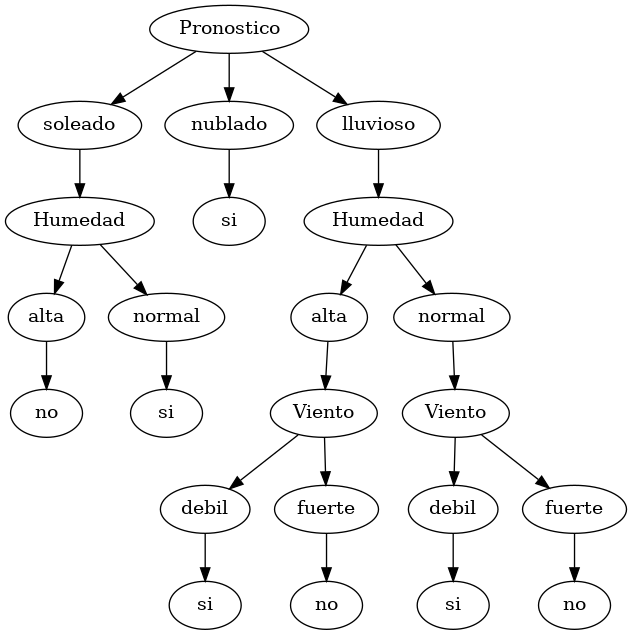

In [2]:
from src.decision_tree import DecisionTree
from IPython.display import Image
config = {
    'gain_function': 'shannon',
    'objective':'Juega'
}
etree = DecisionTree(df, config, simplify=False)

<soleado, calido, normal, fuerte>

dot = etree.digraph()
dot.format = 'png'
dot.render(filename='digraph1', directory='./graphics')

Image('graphics/digraph1.png')

Que pasa cuando esta nublado?

In [3]:
df[df['Pronostico'] == 'nublado']

,Pronostico,Temperatura,Humedad,Viento,Juega
2,nublado,calido,alta,debil,si
6,nublado,frio,normal,fuerte,si
11,nublado,templado,alta,fuerte,si
12,nublado,calido,normal,debil,si


Cuando esta nublado juega siempre, entonces se puede discriminar directamente con este pronostico. Por lo tanto luego de nublado -> si

veamos como esta la tabla cuando el pronostico es lluvioso y cuando esta soleado

In [4]:
df[df['Pronostico'] == 'lluvioso']

,Pronostico,Temperatura,Humedad,Viento,Juega
3,lluvioso,templado,alta,debil,si
4,lluvioso,frio,normal,debil,si
5,lluvioso,frio,normal,fuerte,no
9,lluvioso,templado,normal,debil,si
13,lluvioso,templado,alta,fuerte,no


In [5]:
df[df['Pronostico'] == 'soleado'].drop('Pronostico', axis=1)

,Temperatura,Humedad,Viento,Juega
0,calido,alta,debil,no
1,calido,alta,fuerte,no
7,templado,alta,debil,no
8,frio,normal,debil,si
10,templado,normal,fuerte,si


Cuando esta soleado, si la humedad es alta nunca juega -> queda el no directo. Si la humedad es normal siempre juega -> queda el si directo.

En el caso de lluvioso, en 3 y 13 la humedad es alta pero en 3 juega y en 13 no por lo tanto si esta lluvioso humedad ya no discrimina. Por lo tanto me fijo en el siguente atributo: viento.

In [6]:
df[(df['Pronostico'] == 'lluvioso') & (df['Humedad'] == 'alta')]

,Pronostico,Temperatura,Humedad,Viento,Juega
3,lluvioso,templado,alta,debil,si
13,lluvioso,templado,alta,fuerte,no


Si la humedad es alta juega si el viento es debil y no juega si el viento es fuerte

In [7]:
df[(df['Pronostico'] == 'lluvioso') & (df['Humedad'] == 'normal')]

,Pronostico,Temperatura,Humedad,Viento,Juega
4,lluvioso,frio,normal,debil,si
5,lluvioso,frio,normal,fuerte,no
9,lluvioso,templado,normal,debil,si


si la humedad es normal igual que el anterior

Por lo tanto se podria podar el arbol y quedarnos en la parte derecha solo con viento y sus opciones

Esta la opcion de simplificar el arbol pero como esta hecha ahora es costosa y no estoy seguro cuan bien esta

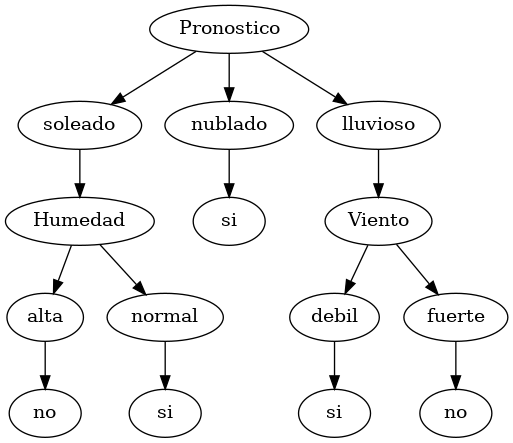

In [8]:
etree = DecisionTree(df, {
    'gain_function': 'shannon',
    'objective':'Juega'
},
                    simplify=True)
dot = etree.digraph()
dot.format = 'png'
dot.render(filename='digraph2', directory='./graphics')

Image('graphics/digraph2.png')